In [2]:
from sklearn.linear_model import LinearRegression
from scipy.stats import skewnorm
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = []

with open('clusters.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    headers = next(reader)
    for row in reader:
        data.append([float(i) for i in row])
df = pd.DataFrame(data, columns = headers)
df

,temp.niche.low,temp.niche.high,temp.max.rate,temp.temp.at.max.rate,water.niche.low,water.high,water.max.r,water.mpa.at.max.r,ext_rate_10,ext_rate_16,ext_rate_22,decomp_rate_mean,ranking
0,7.442857,30.571429,0.768110,23.814286,0.368571,3.412857,0.883828,-0.760000,0.478571,0.627143,0.721429,7.015714,0.374426
1,15.140000,32.680000,11.885342,28.540000,0.200000,1.764000,9.888537,-0.428000,3.224000,6.880000,8.762000,17.648000,0.878003
2,19.057143,32.157143,7.077370,29.228571,0.327143,1.944286,4.284339,-0.597143,0.948571,2.375714,5.042857,6.007143,0.515761
3,16.577778,31.255556,1.313477,26.944444,0.247778,2.420000,1.116078,-0.536667,0.321111,0.583333,1.078889,3.467778,0.277910
4,16.600000,34.200000,12.161347,30.400000,0.120000,1.310000,11.397738,-0.260000,3.300000,5.850000,8.670000,34.010000,0.788430
5,20.800000,30.100000,7.549717,27.300000,0.100000,1.290000,4.777815,-0.240000,0.360000,1.280000,4.620000,21.870000,0.284747
6,20.400000,37.625000,10.646496,33.425000,0.222500,1.685000,4.696383,-0.425000,1.442500,2.792500,5.700000,13.105000,0.634340


In [62]:
#linear fit
results = [['cluster', 'm_l', 'b_l', 'm_r', 'b_r', 'max_rate_temp']]

for ind, cluster in enumerate(data):
    max_rate_temp = cluster[3]
    max_rate = cluster[2]
    #low, high, at max rate, 10, 16, 22
    d = {'temp': [cluster[0], cluster[1], max_rate_temp, 10, 16, 22], 'rate': [max_rate/2, max_rate/2, max_rate, cluster[8], cluster[9], cluster[10]]}
    df_c = pd.DataFrame(data=d)
    df_left = df_c[df_c['temp'] <= max_rate_temp]
    df_right = df_c[df_c['temp'] >= max_rate_temp]
    
    lr_left = LinearRegression()
    lr_left.fit([[x] for x in df_left['temp']], df_left['rate'])
    lr_right = LinearRegression()
    lr_right.fit([[x] for x in df_right['temp']], df_right['rate'])
    results.append([ind, lr_left.coef_[0], lr_left.intercept_, lr_right.coef_[0], lr_right.intercept_, max_rate_temp])

In [63]:
results

[['cluster', 'm_l', 'b_l', 'm_r', 'b_r', 'max_rate_temp'],
 [0,
  0.022386547685008133,
  0.24100277319592833,
  -0.056836883139534916,
  2.1216396520514964,
  23.814285714285717],
 [1,
  0.4511062934641121,
  -0.9326824015779609,
  -1.435427775917874,
  52.85245070929612,
  28.54],
 [2,
  0.33043631915786953,
  -2.566619749282973,
  -1.2083315103658525,
  42.39517413512192,
  29.228571428571428],
 [3,
  0.061551791077036226,
  -0.33596147932566056,
  -0.1523362864304124,
  5.418093920708335,
  26.944444444444443],
 [4,
  0.4379930964723925,
  -1.1094647269754585,
  -1.6001772394736826,
  60.80673509999994,
  30.4],
 [5,
  0.42348668843815834,
  -4.622498935981403,
  -1.3481638189285714,
  44.35458964275,
  27.3],
 [6,
  0.40506626023253656,
  -3.068225454860606,
  -1.267440053482142,
  53.01068023689059,
  33.425]]

In [6]:
with open('rate_temp_fit.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for row in results:
        writer.writerow(row)

In [33]:
#skew normal fit
for ind, cluster in enumerate(data):
    max_rate_temp = cluster[3]
    max_rate = cluster[2]
    #low, high, at max rate, 10, 16, 22
    d = [[cluster[0], cluster[1], max_rate_temp, 10, 16, 22], [max_rate/2, max_rate/2, max_rate, cluster[8], cluster[9], cluster[10]]]
    rv_data = []
    for i in range(6):
        rv_data.extend([d[0][i]]*int(round(d[1][i]*100)))
    sn = skewnorm.fit(rv_data)
    print(sn)
    
        

(-2.5582887580362454, 27.062148713494096, 10.833584699194912)
(-0.5254053646967718, 25.332259336982702, 7.6786124360496535)
(-1265323.2382764868, 32.15718073064016, 10.048708238174594)
(-99438.50330970329, 31.256080208732584, 10.801189355501627)
(-0.6018862571281477, 27.12162288670155, 8.47511634371547)
(-5054.631151605537, 30.10497085310795, 7.141679892623237)
(-1.4113431832605503, 34.79937084843105, 11.11814889325047)


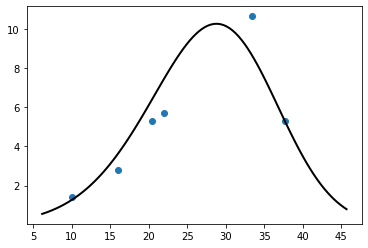

In [45]:
fig, ax = plt.subplots(1, 1)
a = sn[0]
rv = skewnorm(a=a, loc=sn[1], scale=sn[2])
x = np.linspace(skewnorm.ppf(0.01, a=a, loc=sn[1], scale=sn[2]),
                skewnorm.ppf(0.99, a=a, loc=sn[1], scale=sn[2]), 100)
ax.plot(x, rv.pdf(x)*20*max_rate, 'k-', lw=2, label='frozen pdf')
ax.scatter(d[0], d[1])
plt.show()

[[Model]]
    Model(skewed_gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 51
    # data points      = 6
    # variables        = 4
    chi-square         = 0.20495663
    reduced chi-square = 0.10247831
    Akaike info crit   = -12.2602982
    Bayesian info crit = -13.0932603
[[Variables]]
    amplitude:  191.326347 +/- 6.66008679 (3.48%) (init = 127.1302)
    center:     37.3511322 +/- 0.41063763 (1.10%) (init = 33.425)
    sigma:      13.0221733 +/- 0.96296699 (7.39%) (init = 4.604167)
    gamma:     -5.46926575 +/- 3.04005155 (55.58%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, gamma)      = -0.921
    C(center, sigma)     =  0.921
    C(center, gamma)     = -0.898
    C(amplitude, gamma)  =  0.706
    C(amplitude, center) = -0.607
    C(amplitude, sigma)  = -0.535


<ipython-input-60-c33dc52217d3>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


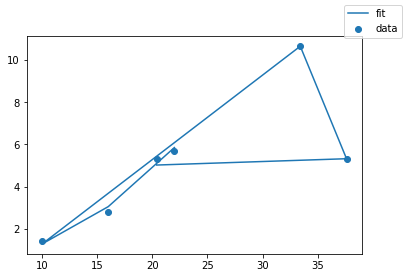

In [60]:
from lmfit.models import SkewedGaussianModel
import pylab

x, y =d[0], d[1]
x = np.array(x)
y = np.array(y)
model = SkewedGaussianModel()

# set initial parameter values
pars = model.guess(y, x=x)

# adjust parameters  to best fit data.
result = model.fit(y, pars, x=x)

print(result.fit_report())
fig, ax = plt.subplots(1, 1)
ax.scatter(x, y, label='data')
ax.plot(np.sort(x), result.best_fit, label='fit') 
fig.legend()
fig.show()

In [8]:
#water rate fit
results = [['cluster', 'm_l', 'b_l', 'm_r', 'b_r', 'max_rate_water']]

for ind, cluster in enumerate(data):
    x = [-1*cluster[4], -1*cluster[5], cluster[7]] #low(high when neg), high(low when neg), at max rate
    m_l = .5/(x[2]-x[1])
    b_l = 1 - m_l*x[2]
    m_r = -.5/(x[0]-x[2])
    b_r = 1 - m_r*x[2]
    results.append([ind, m_l, b_l, m_r, b_r, cluster[7]])

In [9]:
results

[['cluster', 'm_l', 'b_l', 'm_r', 'b_r', 'max_rate_water'],
 [0,
  0.1884760366182014,
  1.143241787829833,
  -1.2773722627737225,
  0.02919708029197088,
  -0.76],
 [1,
  0.3742514970059881,
  1.160179640718563,
  -2.192982456140351,
  0.06140350877192979,
  -0.428],
 [2,
  0.3711558854718982,
  1.2216330858960764,
  -1.8518518518518514,
  -0.10582010582010559,
  -0.5971428571428572],
 [3,
  0.26548672566371684,
  1.1424778761061947,
  -1.7307692307692308,
  0.07115384615384623,
  -0.5366666666666666],
 [4,
  0.47619047619047616,
  1.1238095238095238,
  -3.571428571428571,
  0.07142857142857151,
  -0.26],
 [5,
  0.47619047619047616,
  1.1142857142857143,
  -3.5714285714285716,
  0.1428571428571428,
  -0.24],
 [6,
  0.3968253968253968,
  1.1686507936507937,
  -2.469135802469136,
  -0.04938271604938271,
  -0.425]]

In [10]:
with open('percentmaxr_water_fit.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for row in results:
        writer.writerow(row)